In [1]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 

Загрузка набора данных


In [2]:
data_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

x_train = np.array(data_train.iloc[:, 1:])
y_train = np.array(data_train.iloc[:, 0])

x_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

Именуем классы

In [3]:
object_classes = ['футболка', 'штаны', 'кофта', 'платье', 'куртка', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем изображений и классов, к которым они относятся


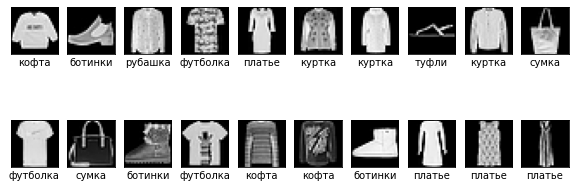

In [4]:
plt.figure(figsize=(10, 10))
for i in range(0, 20):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.xlabel(object_classes[y_train[i]])

Преобразуем размер данных

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255 

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255 

Преобразуем результаты в унитарный код

In [6]:
y_train = utils.to_categorical(y_train)

# y_test = utils.to_categorical(y_test)

Создаем нейронную сеть и описываем ее архитектуру

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

Компилируем сеть

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Обучаем нейронную сеть

In [9]:
model.fit(x_train, y_train, batch_size=200, epochs=50, verbose=1)

Epoch 1/50
300/300 [==============================] - 101s 336ms/step - loss: 0.1054 - accuracy: 0.7677
Epoch 2/50
300/300 [==============================] - 100s 334ms/step - loss: 0.0677 - accuracy: 0.8609
Epoch 3/50
300/300 [==============================] - 102s 339ms/step - loss: 0.0584 - accuracy: 0.8814
Epoch 4/50
300/300 [==============================] - 100s 335ms/step - loss: 0.0531 - accuracy: 0.8930
Epoch 5/50
300/300 [==============================] - 100s 334ms/step - loss: 0.0491 - accuracy: 0.9003
Epoch 6/50
300/300 [==============================] - 100s 334ms/step - loss: 0.0463 - accuracy: 0.9061
Epoch 7/50
300/300 [==============================] - 101s 338ms/step - loss: 0.0441 - accuracy: 0.9111
Epoch 8/50
300/300 [==============================] - 100s 333ms/step - loss: 0.0422 - accuracy: 0.9155
Epoch 9/50
300/300 [==============================] - 100s 335ms/step - loss: 0.0406 - accuracy: 0.9186
Epoch 10/50
300/300 [==============================] - 101s 336m

Сохраняем обученную сеть для дальнейшего использования

In [11]:
model.save('fashion-mnist.h5')

Номер: 0
Название: футболка


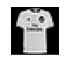

In [12]:
from tensorflow.keras.models import load_model

plt.figure(figsize=(10, 10))
plt.subplot(5, 10, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
prediction = model.predict(x_test)
prediction = np.argmax(prediction[0])
print('Номер:', prediction)
print('Название:', object_classes[prediction])